## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

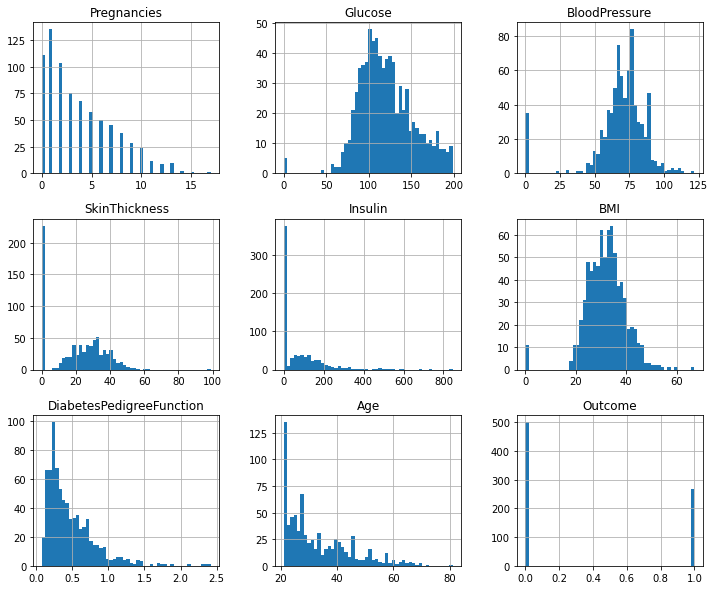

In [6]:
df.hist(bins = 50, figsize = (12, 10))
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

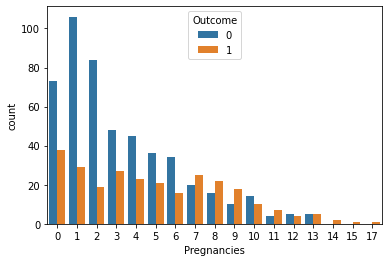

In [7]:
sns.countplot(data = df, x = 'Pregnancies', hue = 'Outcome')

## Feature Engineering
### 수치형 변수를 범주형 변수로 만들기

In [8]:
# Pregnancies_high 파생변수 만들기
# 임신횟수가 6보다 큰 값의 True, False 값을 파생변수로 만들기
df["Pregnancies_high"] = df['Pregnancies'] > 6
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


### 결측치 다루기

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

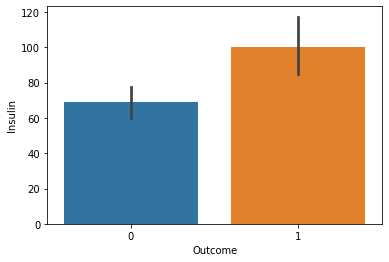

In [9]:
sns.barplot(data = df, x = 'Outcome', y = 'Insulin')

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

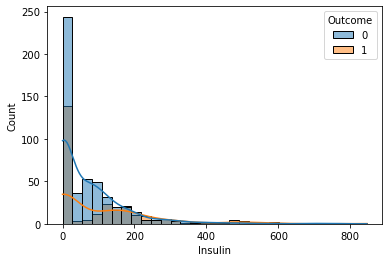

In [10]:
sns.histplot(data = df, x = "Insulin", hue = 'Outcome', kde = True)

In [11]:
df['Insulin'].value_counts().sort_index()

0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [12]:
# Insulin의 0 값을 결측치로 만들어 Insulin_nan 이라는 새로운 컬럼을 만들기

df['Insulin_nan'] = df['Insulin'].replace(0, np.nan) # 0이 너무 많다
df['Insulin_nan']

0        NaN
1        NaN
2        NaN
3       94.0
4      168.0
       ...  
763    180.0
764      NaN
765    112.0
766      NaN
767      NaN
Name: Insulin_nan, Length: 768, dtype: float64

<AxesSubplot:xlabel='Insulin_nan', ylabel='Count'>

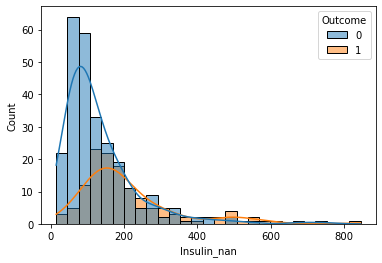

In [13]:
sns.histplot(data = df, x = "Insulin_nan", hue = 'Outcome', kde = True)

In [14]:
# 결측치 수
df['Insulin_nan'].isnull().sum()

374

In [15]:
# 결측치 비율
df['Insulin_nan'].isnull().mean() # 48%

0.4869791666666667

In [16]:
df.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ...   Age       Insulin_nan                          \
               mean  ...   75%   max       count        mean         std   
Outcome              ...                                                   
0        109.980000  ...  37.0  81.0       264.0  130.287879  102.482237   
1        141.257463  ...  44.0  70.0       130.0  206.846154  132.699898   

                                            
          min    25%    50%     75%    max  
Outcome                                     
0        15.0   66.0  102.5  161.25  744.0  
1        14.0  127.5  169.5  239.25  846.0  

[2 rows x 72 columns]

In [17]:
# groupby 로 당뇨병 여부에 따라 평균, 중앙값 구하기
in_desc = df.groupby('Outcome')["Insulin_nan"].describe()
in_desc

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [18]:
df['Insulin_filled'] = df['Insulin_nan']

In [19]:
# 결측치 채우기
df.loc[(df['Insulin_nan'].isnull()) & (df['Outcome'] == 0), 'Insulin_filled'] = in_desc.loc[0, '75%']
df.loc[(df['Insulin_nan'].isnull()) & (df['Outcome'] == 1), 'Insulin_filled'] = in_desc.loc[1, '75%']
df['Insulin_filled'].isnull().sum()

0

In [20]:
df.loc[(df['Insulin_nan'].isnull()) & (df['Outcome'] == 0), 'Insulin_filled']

1      161.25
5      161.25
7      161.25
10     161.25
12     161.25
        ...  
756    161.25
758    161.25
762    161.25
764    161.25
767    161.25
Name: Insulin_filled, Length: 236, dtype: float64

In [21]:
df.loc[(df['Insulin_nan'].isnull()) & (df['Outcome'] == 1), 'Insulin_filled']

0      239.25
2      239.25
9      239.25
11     239.25
15     239.25
        ...  
754    239.25
757    239.25
759    239.25
761    239.25
766    239.25
Name: Insulin_filled, Length: 138, dtype: float64

### 이상치(outlier) 다루기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

/Users/imyeongjin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_filled'>

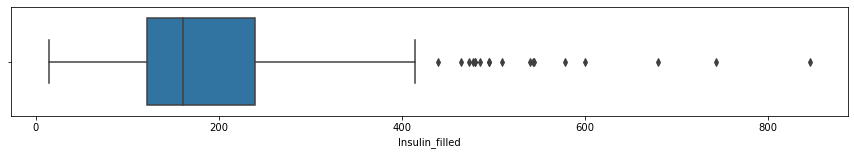

In [22]:
plt.figure(figsize=(15, 2))
sns.boxplot(df["Insulin_filled"])

In [23]:
df["Insulin_filled"].isnull().describe()

count       768
unique        1
top       False
freq        768
Name: Insulin_filled, dtype: object

In [24]:
df["Insulin_nan"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin_nan, dtype: float64

In [25]:
# 이상치 찾기


## 학습, 예측 데이터셋 나누기

In [26]:
df.shape

(768, 12)

In [27]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [28]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count]
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_filled
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,239.25
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,161.25
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,239.25
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.00
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,168.00
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0,False,182.0,182.00
610,3,106,54,21,158,30.9,0.292,24,0,False,158.0,158.00
611,3,174,58,22,194,32.9,0.593,36,1,False,194.0,194.00
612,7,168,88,42,321,38.2,0.787,40,1,True,321.0,321.00


In [29]:
test = df[split_count:]
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_filled
614,11,138,74,26,144,36.1,0.557,50,1,True,144.0,144.00
615,3,106,72,0,0,25.8,0.207,27,0,False,NaN,161.25
616,6,117,96,0,0,28.7,0.157,30,0,False,NaN,161.25
617,2,68,62,13,15,20.1,0.257,23,0,False,15.0,15.00
618,9,112,82,24,0,28.2,1.282,50,1,True,NaN,239.25
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,180.0,180.00
764,2,122,70,27,0,36.8,0.340,27,0,False,NaN,161.25
765,5,121,72,23,112,26.2,0.245,30,0,False,112.0,112.00
766,1,126,60,0,0,30.1,0.349,47,1,False,NaN,239.25


## 정답값이자 예측해야 될 값

In [30]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측에 사용할 컬럼

In [31]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high',
 'Insulin_nan',
 'Insulin_filled']

In [32]:
feature_names.remove(label_name)

In [33]:
feature_names.remove('Pregnancies')

In [34]:
feature_names.remove('Insulin')

In [35]:
feature_names.remove('Insulin_nan')

In [36]:
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled']

## 학습, 예측 데이터셋 만들기

In [37]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_filled
0,148,72,35,33.6,0.627,50,False,239.25
1,85,66,29,26.6,0.351,31,False,161.25
2,183,64,0,23.3,0.672,32,True,239.25
3,89,66,23,28.1,0.167,21,False,94.00
4,137,40,35,43.1,2.288,33,False,168.00
...,...,...,...,...,...,...,...,...
609,111,62,13,24.0,0.138,23,False,182.00
610,106,54,21,30.9,0.292,24,False,158.00
611,174,58,22,32.9,0.593,36,False,194.00
612,168,88,42,38.2,0.787,40,True,321.00


In [38]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train

0      1
1      0
2      1
3      0
4      1
      ..
609    0
610    0
611    1
612    1
613    0
Name: Outcome, Length: 614, dtype: int64

In [39]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
X_test

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_filled
614,138,74,26,36.1,0.557,50,True,144.00
615,106,72,0,25.8,0.207,27,False,161.25
616,117,96,0,28.7,0.157,30,False,161.25
617,68,62,13,20.1,0.257,23,False,15.00
618,112,82,24,28.2,1.282,50,True,239.25
...,...,...,...,...,...,...,...,...
763,101,76,48,32.9,0.171,63,True,180.00
764,122,70,27,36.8,0.340,27,False,161.25
765,121,72,23,26.2,0.245,30,False,112.00
766,126,60,0,30.1,0.349,47,False,239.25


In [40]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test

614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64


## 머신러닝 알고리즘 가져오기

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()


## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier()


## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [43]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

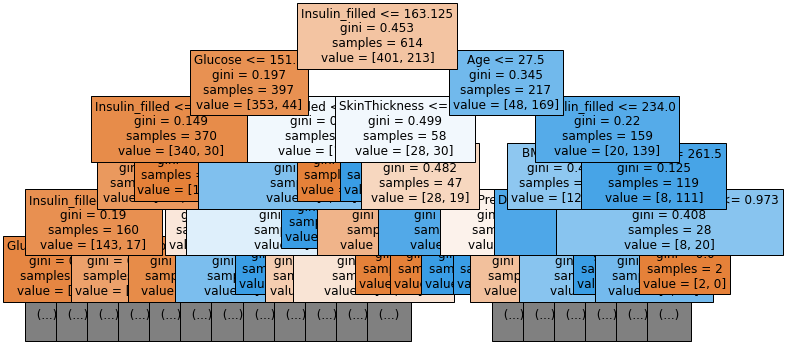

In [44]:
# plot_tree
from sklearn.tree import plot_tree

plt.figure(figsize = (12,6))
plot_tree(model,
         filled = True,
         feature_names = feature_names,
         max_depth = 5,
         fontsize = 12)
plt.show()

In [45]:
# 피처의 중요도를 추출하기



In [46]:
# 피처의 중요도 시각화 하기



## 정확도(Accuracy) 측정하기

In [47]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(y_test == y_predict).mean()

0.8506493506493507

In [48]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8506493506493507

In [49]:
m = 0
c = 0
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth = i,
                                   random_state = 42,
                                    )
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    if m < (y_test == y_predict).mean()*100:
        m = (y_test == y_predict).mean()*100
        c = i
        
    
print(f'max_depth가 {c}일때 {m}')

max_depth가 6일때 89.6103896103896


In [50]:
m = 90.9090909090909
r = 0
for i in range(1,51):
    model = DecisionTreeClassifier(max_depth = c,
                                   random_state = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    if m < (y_test == y_predict).mean()*100:
        m = (y_test == y_predict).mean()*100
        r = i
        
        
print(f'max_depth 가 {c}이고 max_features가 {r}일때 {m}')

max_depth 가 6이고 max_features가 0일때 90.9090909090909
